In [1]:
# Подключим нужные для базовых операций библиотеки
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Подключим пакеты для использования OLS метода и тестов
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Подгрузим полезные функции
from utils import *

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

In [2]:
# Определим параметры выборки для задачи преобразования факторов
# Создадим удобный словарь, чтобы передавать его в функцию
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 5,
    x1_std = 3,
    x2_mean = 2,
    x2_std = 5,
    corr_12 = -0.7,
    
    # Зададим параметры распределения ошибки
    e_mean = 0,
    e_std = 4,

    # Укажем размер выборки
    N = 1000,

    # Зададим действительные параметры модели
    beta0 = 5,
    beta1 = 6,
    beta2 = 2
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

In [4]:
# Сгенерируем датасет с нормальным распределением в регрессоре
data = gen_data(y_type='multivariate', params=dist_params, seed=RANDOM_SEED)

display(data)

,x1,x2,e,y
0,3.546989,4.326496,-2.700713,32.234213
1,6.080645,6.507212,-0.578075,53.920219
2,5.162123,0.644333,-3.169680,34.091727
3,2.488793,10.440899,-1.231846,39.582710
4,7.092781,0.157415,-7.574459,40.297059
...,...,...,...,...
995,4.365352,6.594243,0.309922,44.690522
996,3.337454,8.467679,1.031010,42.991093
997,6.012108,4.656552,-4.967042,45.418713
998,3.524261,1.106461,1.336706,29.695191


In [9]:

dt_linearity, model_linearity = train_model(data, target='y', feature_names=['x1', 'x2'], return_norm_tests=True, show_stats=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     5651.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:22:56   Log-Likelihood:                -2787.5
No. Observations:                1000   AIC:                             5581.
Df Residuals:                     997   BIC:                             5596.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8354      0.367     13.187      0.0

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.95,0.05,0.671426,True,0.998675,,,gaussian distribution
1,Epps-Pulley test,0.95,0.05,0.957763,True,0.014878,0.3778,True,gaussian distribution
2,D'Agostino's K-squared test,0.95,0.05,0.407309,True,1.796368,,,gaussian distribution
3,Anderson-Darling test,0.95,0.05,,,0.225355,0.784,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.95,0.05,0.884376,True,0.018314,,,gaussian distribution
5,Lilliefors test,0.95,0.05,0.641481,True,0.018434,,,gaussian distribution
6,Cramér–von Mises test,0.95,0.05,0.956451,True,0.035144,,,gaussian distribution
7,Chi-squared test,0.95,0.05,1.0,True,-31274997412295114752.0,,,gaussian distribution
8,Jarque–Bera test,0.95,0.05,-,-,-,,,count less than 2000
9,skewtest,0.95,0.05,0.445155,True,0.763517,,,gaussian distribution


## Интерпретация:
Значение $R^2 = 0.919$, что является оптимальным значением для такой простой обучающей выборки. Все тесты говорят о нормальности распределения остатков.

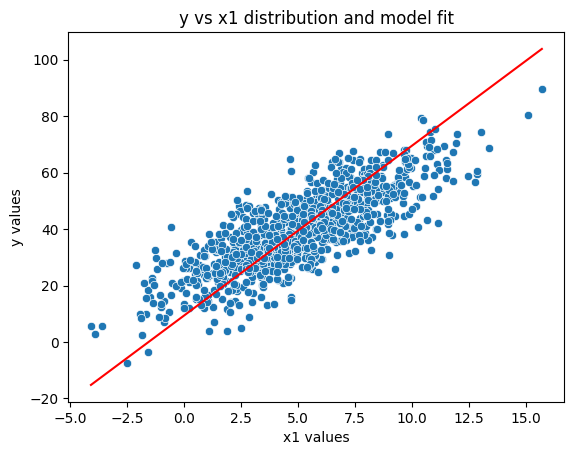

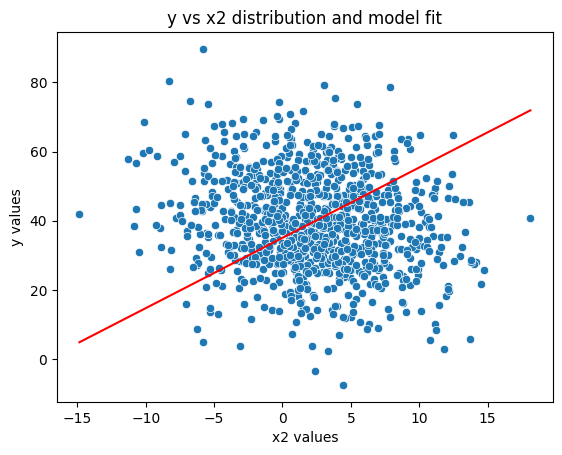

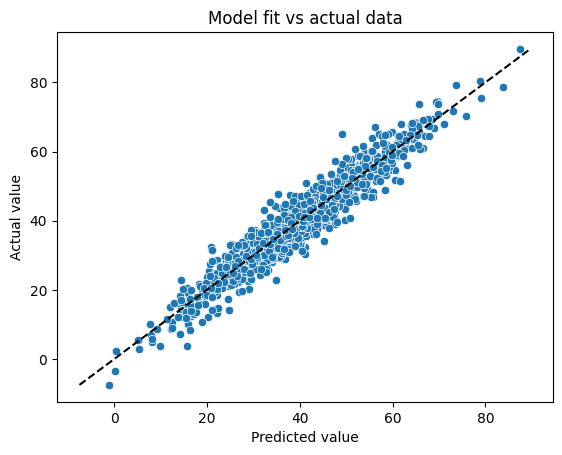

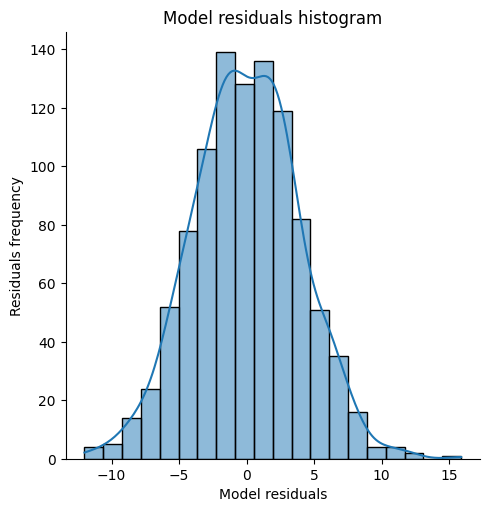

In [7]:

dt_linearity, model_linearity = train_model(dt_linearity, target='y', feature_names=['x1', 'x2'], show_results=True, pairwise=False, return_norm_tests=False, show_stats=False)

## Интерпретация:
Как можно заметить, зависимост y от x_1 действительно линейная, сл-но, класс линейных моделей является оптимальных. Также на графике зависимоти у от х_2 видно, что признак распределен близко к нормальному распределнию.

In [ ]:
coefs_list = dict(
    b1 = [],
    b1_low = [],
    b1_high = [],
    b2 = [],
    b2_low = [],
    b2_high = [],
)

for i in range(30, 1001):
    dist_params['N'] = i
    data = gen_data(y_type='multivariate', params=dist_params, seed=RANDOM_SEED)
    _, model = train_model(data, target='y', feature_names=['x1', 'x2'])
    intervals = model.conf_int()
    coefs_list['b1'].append(model.params[1])
    coefs_list['b1_low'].append(intervals.iloc[1][0])
    coefs_list['b1_high'].append(intervals.iloc[1][1])
    coefs_list['b2'].append(model.params[2])
    coefs_list['b2_low'].append(intervals.iloc[2][0])
    coefs_list['b2_high'].append(intervals.iloc[2][1])

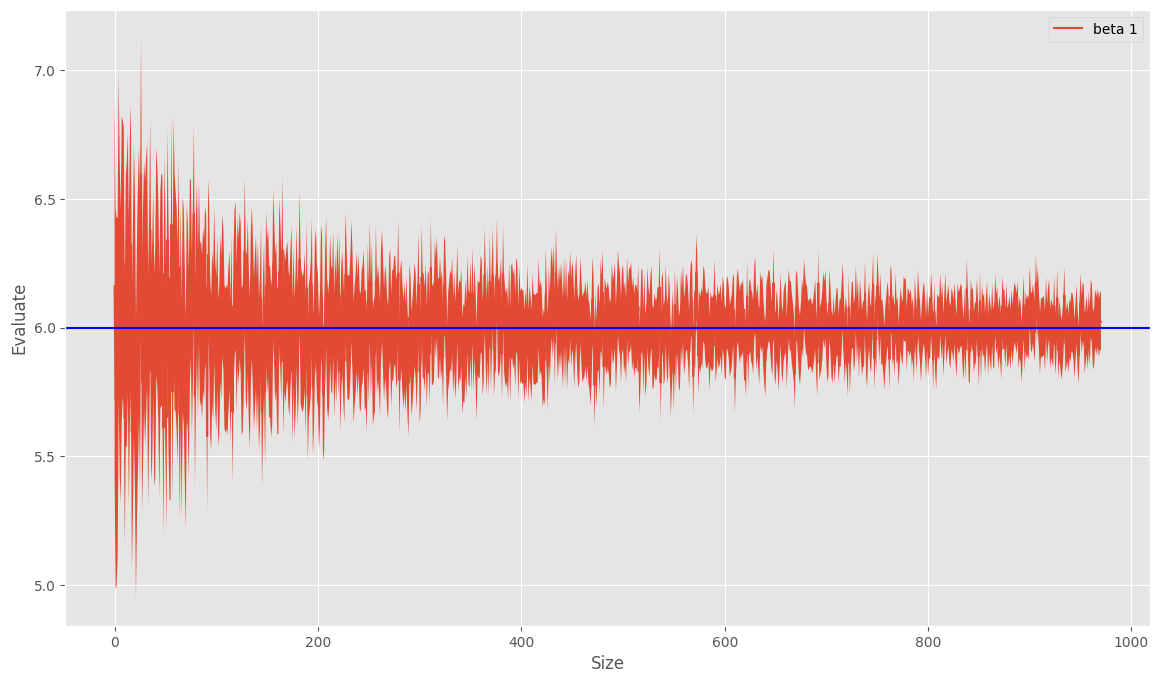

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(14,8))
X = [i for i in range(0, 971)]
plt.fill_between(X, coefs_list['b1_low'], coefs_list['b1_high'])
plt.plot(coefs_list['b1'], label='beta 1')
plt.axhline(dist_params['beta1'], color='b')
plt.xlabel('Size')
plt.ylabel('Evaluate')
plt.legend()
plt.show()


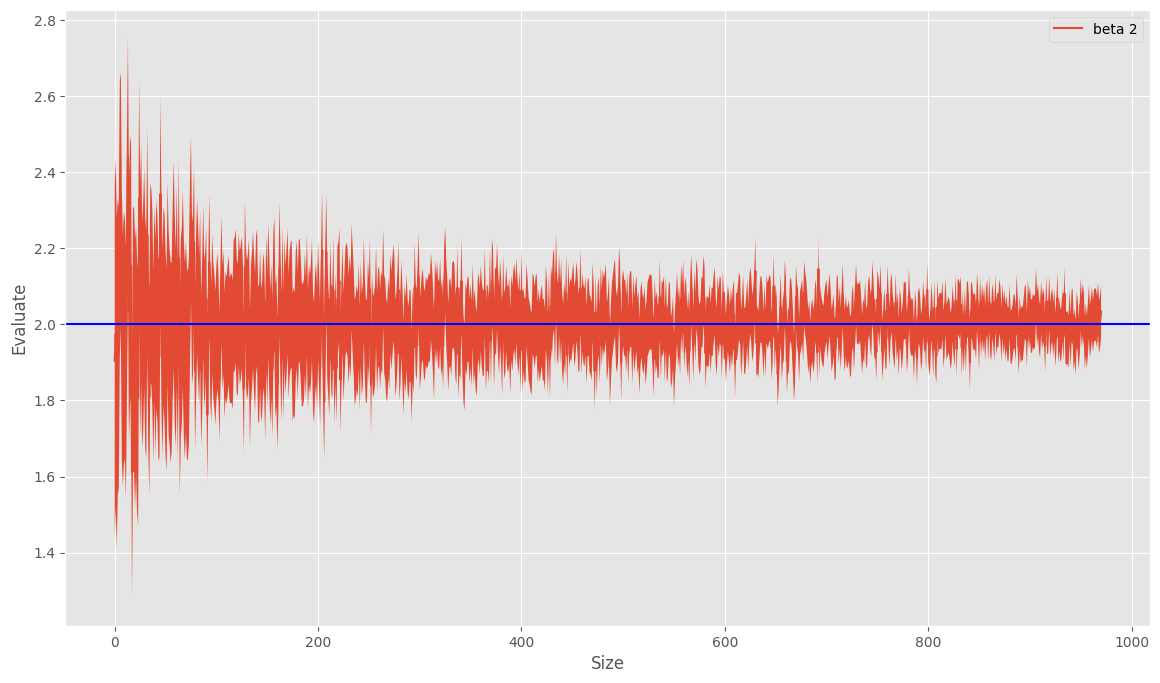

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(14,8))
X = [i for i in range(0, 971)]
plt.fill_between(X, coefs_list['b2_low'], coefs_list['b2_high'])
plt.plot(coefs_list['b2'], label='beta 2')
plt.axhline(dist_params['beta2'], color='b')
plt.xlabel('Size')
plt.ylabel('Evaluate')
plt.legend()
plt.show()